In [2]:
import pandas as pd;
import numpy as np;
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
callsData = pd.read_csv('./AirLinesData/callsf0d4f5a.csv');
customerData = pd.read_csv('./AirLinesData/customers2afd6ea.csv');
reasonData = pd.read_csv('./AirLinesData/reason18315ff.csv');
sentimentData = pd.read_csv('./AirLinesData/sentiment_statisticscc1e57a.csv');
testData1 = pd.read_csv('./AirLinesData/testbc7185d.csv');

In [6]:
callsData.head(5)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [7]:
customerData.head(5)

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [8]:
reasonData.head(5)

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [9]:
sentimentData.head(5)

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [10]:
testData1.head(5)

,call_id
0,7732610078
1,2400299738
2,6533095063
3,7774450920
4,9214147168


In [11]:
callsData.loc[0,'call_transcript']

"\n\nAgent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?\n\nCustomer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. \n\nAgent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. *typing sounds* Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.\n\nCustomer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day. \n\nAgent: I understand your frustration sir, delays are never fun. Let me see what options I have available to help

In [12]:
uniqueCategories = reasonData['primary_call_reason'].unique();
uniqueCategories

array(['Voluntary  Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage   Plus', 'Checkout', 'Voluntary   Change', 'Post Flight',
       'Check In', 'Other  Topics', 'Communications', 'Schedule Change',
       'Products & Services', 'IRROPS  ', 'Digital   Support',
       'Seating  ', 'Disability', 'Unaccompanied Minor', ' Baggage',
       'Traveler  Updates', 'Communications  ', 'ETC', 'Upgrade  ',
       'Unaccompanied Minor  ', 'Voluntary Change', 'Voluntary Change  ',
       'Checkout  ', 'Mileage Plus', 'Mileage Plus  ', 'Booking  ',
       'Baggage  ', 'Post-Flight', 'Post-Flight  ', 'Schedule Change  ',
       'Baggage', 'Traveler Updates', 'Voluntary Cancel', 'Check-In',
       'Products and Services', 'Check-In  ', 'Other Topics',
       'Other Topics  ', 'ETC  ', 'Disability  ', 'Digital Support',
       'Digital Support  ', 'Voluntary Cancel  ',
       'Products and Services  ', 'Traveler Updates  ',
       'Traveler   Updates', 'Digital  Support', 'Mileage  P

In [13]:
uniqueCategoriesCount = reasonData['primary_call_reason'].value_counts()

<Axes: xlabel='primary_call_reason', ylabel='Count'>

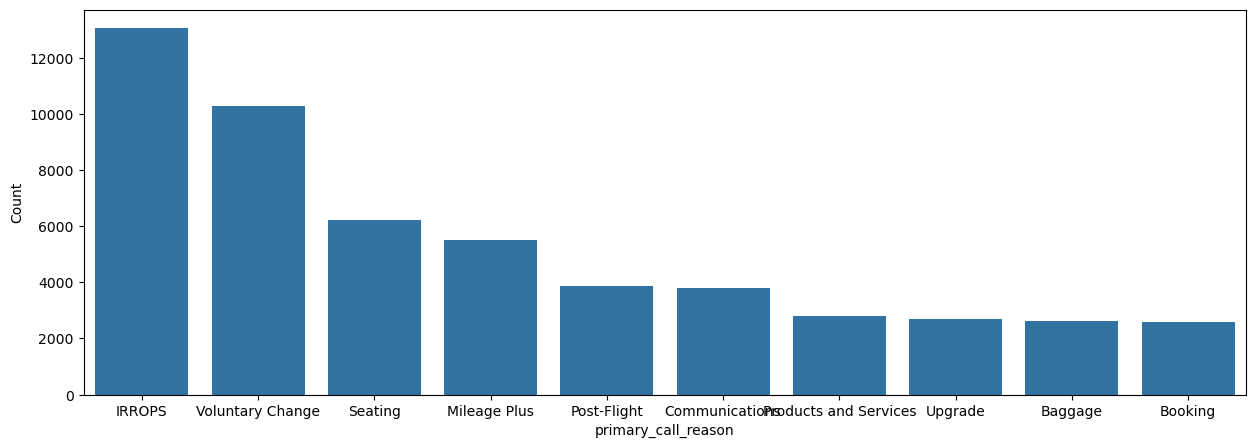

In [15]:
uniqueCategoriesCount = reasonData['primary_call_reason'].value_counts().head(10).reset_index()
uniqueCategoriesCount.columns = ['primary_call_reason', 'Count']
plt.subplots(figsize=(15, 5))
# Now plot using sns.barplot with the correct DataFrame
sns.barplot(data=uniqueCategoriesCount, x="primary_call_reason", y="Count")

In [16]:
# customerData['elite_level_code'].fillna(0,inplace=True)

<Axes: xlabel='elite_level_code', ylabel='count'>

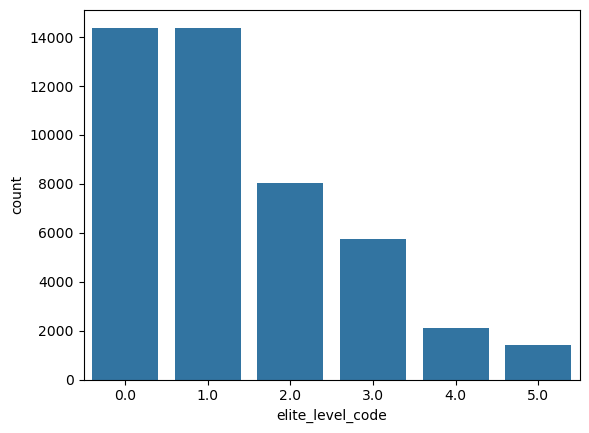

In [17]:
ratingCount = customerData['elite_level_code'].value_counts().reset_index()
ratingCount
# # ratingCount.columns = ['Raing', 'Count']
sns.barplot(data=ratingCount, x="elite_level_code", y="count")

<Axes: xlabel='silence_percent_average', ylabel='Count'>

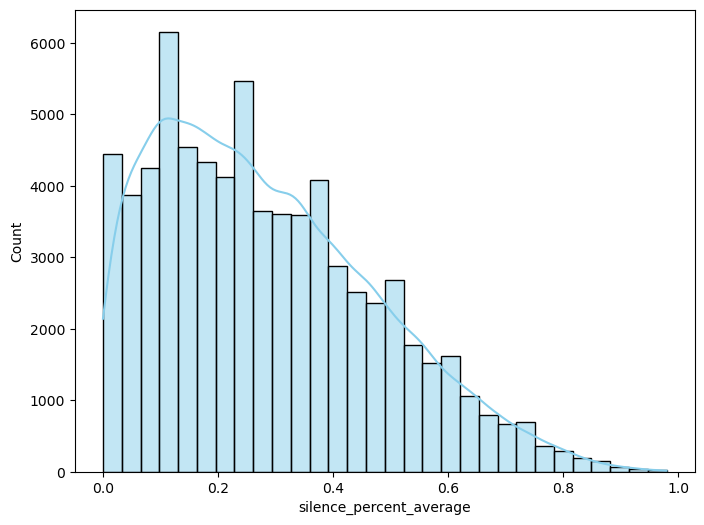

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=sentimentData, x='silence_percent_average', kde=True, bins=30, color='skyblue')


<Axes: xlabel='customer_tone', ylabel='count'>

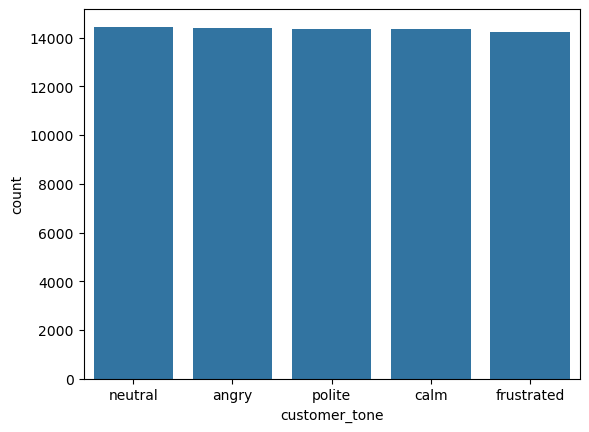

In [19]:
Tone = sentimentData['customer_tone'].value_counts().reset_index()
sns.barplot(data=Tone, x="customer_tone", y="count")

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Load the dataset
# calls_df = pd.read_csv('calls.csv')

# Clean the transcripts by removing NaN or empty strings
# callsData['call_transcript'].fillna('', inplace=True)

# Text Preprocessing: Tokenize transcripts and extract keywords
vectorizer = CountVectorizer(stop_words='english', max_features=500)
X_transcripts = vectorizer.fit_transform(callsData['call_transcript'])

# Create a DataFrame with word frequencies
transcript_keywords = pd.DataFrame(X_transcripts.toarray(), columns=vectorizer.get_feature_names_out())

# Sum keyword frequencies to identify common issues
common_keywords = transcript_keywords.sum().sort_values(ascending=False)

# Display the top keywords
print("Top keywords from call transcripts:")
print(common_keywords.head(20))

# Analyze the top call reasons and their frequency
print("\nTop call reasons:")
print(reasonData['primary_call_reason'].value_counts().head(10))


Top keywords from call transcripts:
flight      631962
agent       555458
customer    549932
let         310728
change      248693
help        201067
like        194177
thank       184727
united      173306
calling     159962
okay        156940
typing      155719
just        135322
work        134236
day         133868
time        127528
need        126268
yeah        123142
really      119979
thanks      119782
dtype: int64

Top call reasons:
primary_call_reason
IRROPS                   13057
Voluntary Change         10291
Seating                   6223
Mileage Plus              5487
Post-Flight               3869
Communications            3779
Products and Services     2792
Upgrade                   2682
Baggage                   2616
Booking                   2589
Name: count, dtype: int64


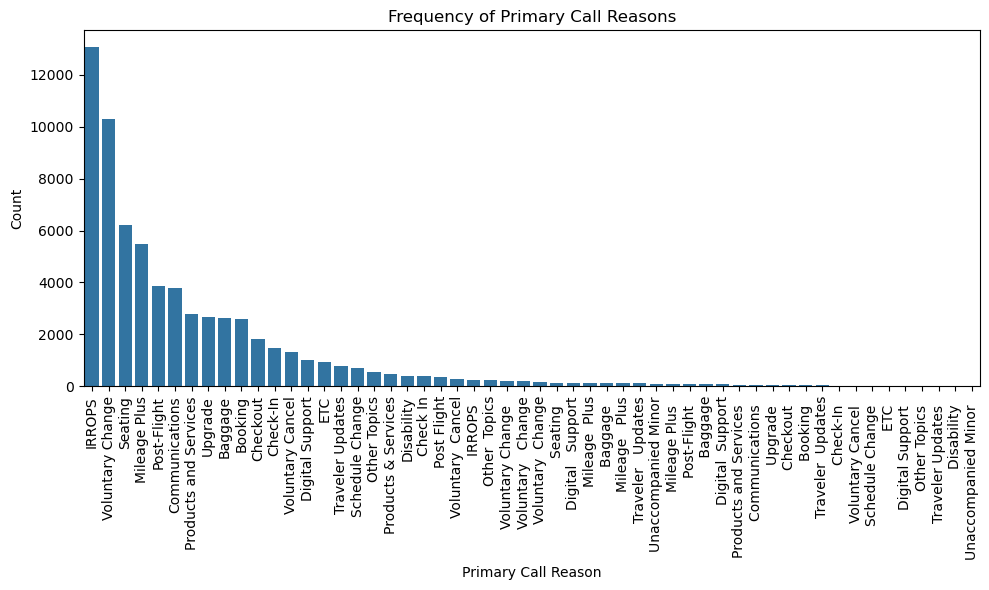

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'primary_call_reason' column

plt.figure(figsize=(10, 6))
sns.countplot(data=reasonData, x='primary_call_reason', order=reasonData['primary_call_reason'].value_counts().index)
plt.title('Frequency of Primary Call Reasons')
plt.xticks(rotation=90)
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


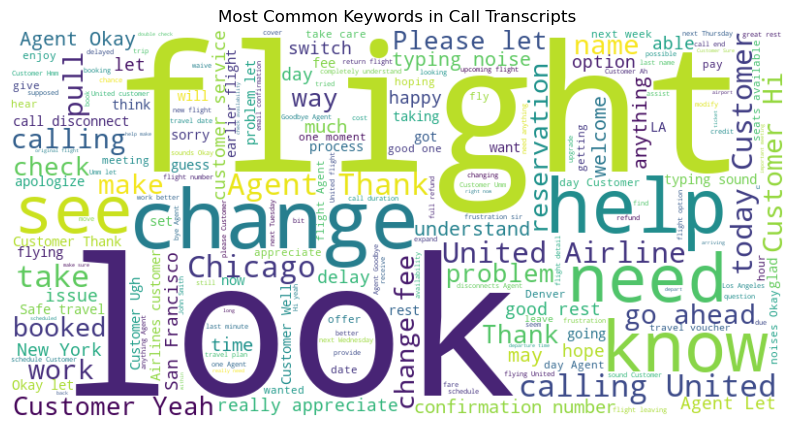

In [22]:
from wordcloud import WordCloud

# Combine all transcripts into a single string
text = ' '.join(callsData['call_transcript'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Keywords in Call Transcripts')
plt.show()


In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='primary_call_reason', y='average_sentiment', hue='primary_call_reason', palette='viridis')
plt.title('Sentiment Score by Primary Call Reason')
plt.xticks(rotation=90)
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

<Figure size 1200x800 with 0 Axes>